In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy.io
import seaborn
import pandas as pd
%matplotlib inline

%pylab inline 
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load in the data

train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

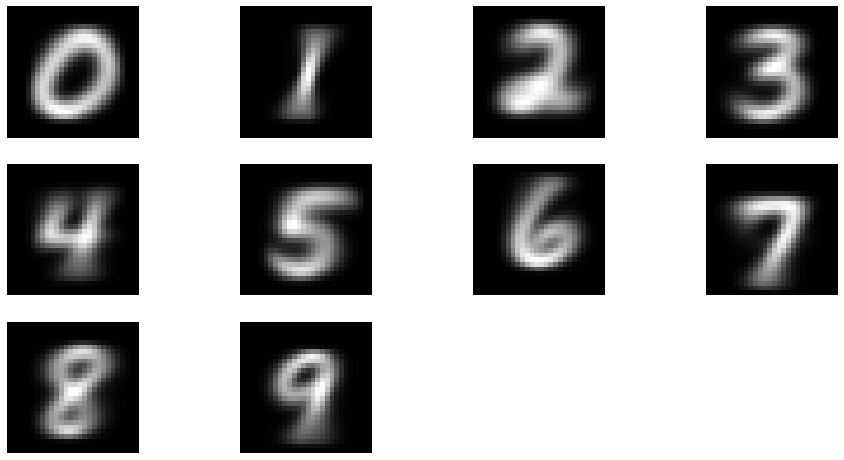

In [3]:
######################## PART 1 ##########################################

# Visualize the expected value of each class and store the mean digits
# Also store all the digits for each class, since might as well

mean_digits = []
digit_classes = []
for i in xrange(10):
    
    # Set up the plot
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Get all the training data for the digit class
    i_digit = train_data[:,np.where(train_labels[:,0]==i)][:,0,:]
    digit_classes.append(i_digit)
    
    # Calculate the mean image for the digit class
    mean_digit = np.mean(i_digit,axis=1)
    mean_digits.append(mean_digit.reshape((784,1)))
    ax.imshow(mean_digit.reshape((28,28)).T,interpolation='nearest',
              cmap=matplotlib.cm.gray)
    
plt.show()

In [4]:
# Helper code for parts 2 and 3

def confusion_matrix(predicted, true):
    """
    Display the confusion matrix for the data given and give the error rate.
    
    Both predicted and true are numpy vectors of integers between 0 and 9
    """
    if len(predicted) != len(true):
        raise ValueError('Predictions and true values must be the same length')
        
    n = len(predicted)
    confusion_mat = np.zeros((10,10))
    for i in xrange(n):
        confusion_mat[predicted[i],true[i]] += 1
    
    ax = seaborn.heatmap(pd.DataFrame(confusion_mat),cmap='Spectral_r')
    ax.set_xlabel('True Digit Class',size=18)
    ax.set_ylabel('Predicted Digit Class',size=18)
    plt.show()
    
    error_rate = (n - np.sum(np.diag(confusion_mat)))/n
    print "Overall Error Rate: ", error_rate*100, "%"
    
    
def likelihood(x, center):
    """
    Calculate the probability that test_pt came from a Gaussian centered
    at the points in the class, as given.
    """
    return np.mean(np.exp(-1.0*np.sum( (x-center)**2, axis=0)))

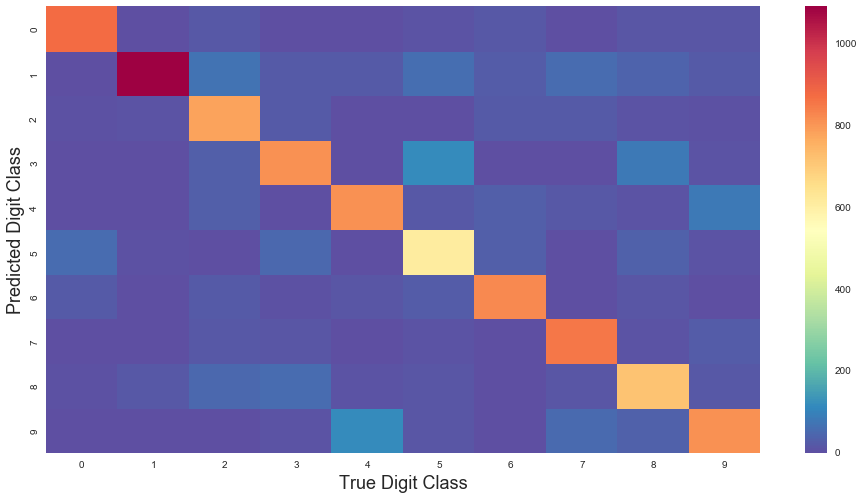

Overall Error Rate:  17.97 %


In [5]:
######################## PART 2 ##########################################

predictions = np.zeros_like(test_labels)
for i in xrange(test_data.shape[1]):
    print i,'\r',
    
    probs = np.zeros(10)
    for j in xrange(10):
        probs[j] = likelihood(test_data[:,i].reshape((784,1)), mean_digits[j])
    predictions[i] = np.argmax(probs)
    
confusion_matrix(predictions, test_labels)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


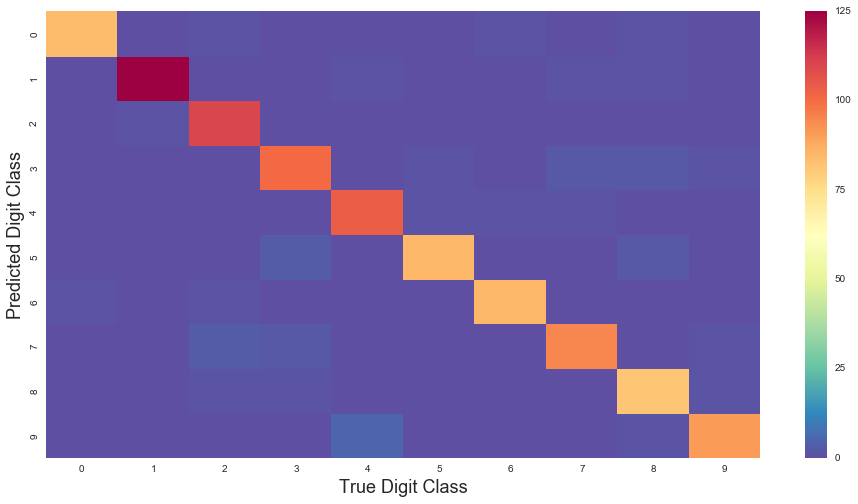

Overall Error Rate:  3.8 %


In [14]:
######################## PART 3 ##########################################

predictions = np.zeros(1000)

for i in xrange(1000):
    print i,'\r',
    
    probs = np.zeros(10)
    for j in xrange(10):
        probs[j] = likelihood(test_data[:,i].reshape((784,1)), digit_classes[j])
    
    predictions[i] = np.argmax(probs)
    
confusion_matrix(predictions, test_labels[:1000])

Outlier at Index 41


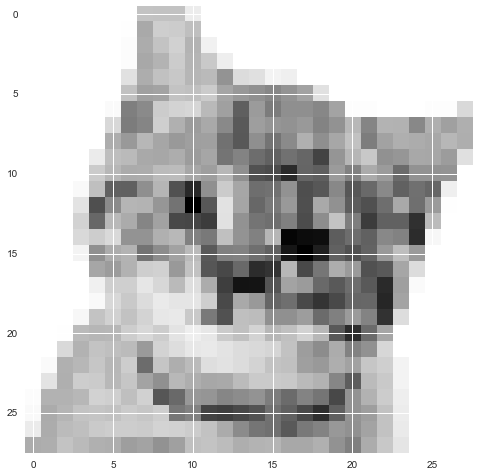

In [44]:
# Compare all the training data to the mean to find the outlier

train_probs = np.zeros(1000)

for i in xrange(1000):
    print i,'\r',
    
    probs = np.zeros(10)
    for j in xrange(10):
        probs[j] = likelihood(train_data[:,i].reshape((784,1)), mean_digits[j])
    
    predictions[i] = np.argmax(probs)
    prediction_probs[i] = np.max(probs)
    
min_ind = np.argsort(prediction_probs)[0]
pylab.rcParams['figure.figsize'] = (8.0,8.0) # Control figure size 

ax = plt.imshow(train_data[:,min_ind].reshape((28,28)).T,interpolation='nearest',
           cmap=matplotlib.cm.gray)
print 'Outlier at Index ' + str(min_ind)
    
plt.show()